### 다중회귀 - 보스턴 집 값

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


 - Feature별 산점도와 선형회귀선

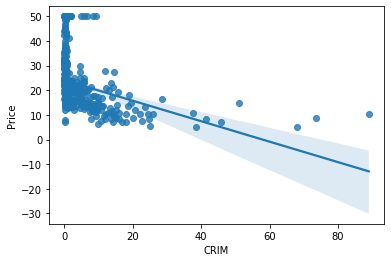

In [6]:
sns.regplot(x='CRIM', y='Price', data=df)

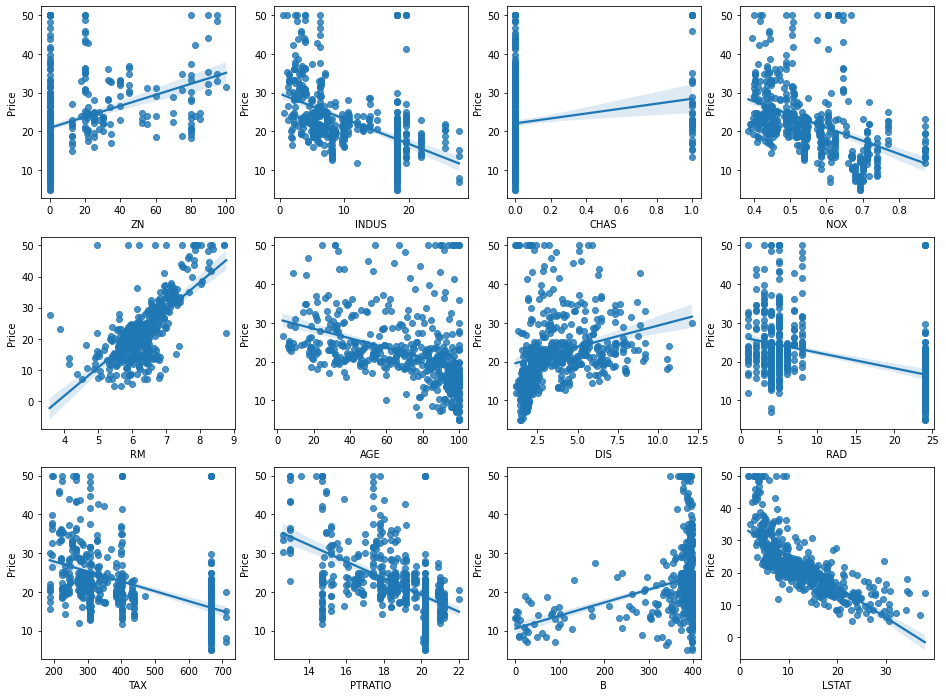

In [7]:
# 위의 데이터 프레임의 컬럼과 price의 상관관계 그래프를 반복문으로 그리기
_, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
  row, col = i//4, i%4
  sns.regplot(x=feature, y='Price', data=df, ax=axs[row][col])

 - Feature별 결정계수 (R squared value)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
for feature in df.columns[:-1]:
  lr = LinearRegression()
  X = df[feature].values.reshape(-1,1) # 데이터프레임을 넘파이 배열구조로
  lr.fit(X, boston.target)
  score = lr.score(X, boston.target)
  print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


 - 다중 선형 회귀

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=2022)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# R-squared 값 계산
lr.score(X_train, y_train)

0.7444811414684593

In [13]:
lr.coef_ # 계수(weight)

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [14]:
# 절편(bias)
lr.intercept_

30.950814924201126

 - 회귀식
 <pre>
 y = -1.18 * CRIM + 4.72 * ZN + 4.93 * INDUS..... -5.27*LSTAT

In [15]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [16]:
# weight와 bias를 이용하여 직접 R-squared를 구한거
np.dot(lr.coef_, X_test[0]) + lr.intercept_

21.227539118774818

In [17]:
#predict method
lr.predict(X_test[0].reshape(1,-1)) #lr.predict(X_test[:-1])

array([21.22753912])

In [18]:
# 10개의 테스트에 대해 적용
for i in range(10):
  pred1= np.dot(lr.coef_,X_test[i]) + lr.intercept_
  pred2 = lr.predict(X_test[i].reshape(1,-1))
  print(f'실제값: {y_test[i]}, \t직접 계산한 값: {pred1: .4f}, \tLR 예측값: {pred2[0]:.4f}')

실제값: 20.1, 	직접 계산한 값:  21.2275, 	LR 예측값: 21.2275
실제값: 11.9, 	직접 계산한 값:  7.0638, 	LR 예측값: 7.0638
실제값: 20.6, 	직접 계산한 값:  21.4743, 	LR 예측값: 21.4743
실제값: 33.2, 	직접 계산한 값:  35.7832, 	LR 예측값: 35.7832
실제값: 20.8, 	직접 계산한 값:  18.2366, 	LR 예측값: 18.2366
실제값: 13.5, 	직접 계산한 값:  13.4321, 	LR 예측값: 13.4321
실제값: 24.7, 	직접 계산한 값:  24.7007, 	LR 예측값: 24.7007
실제값: 13.9, 	직접 계산한 값:  13.0563, 	LR 예측값: 13.0563
실제값: 10.4, 	직접 계산한 값:  6.3579, 	LR 예측값: 6.3579
실제값: 19.7, 	직접 계산한 값:  13.6734, 	LR 예측값: 13.6734


### 회귀는 꼭 선형회귀를 써야 되나?
 - Linear Regression, 결정트리, SVM, xgboost, Randomforest

#### 1. 선형 회귀(Linear Regression)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

#### 2. 결정 트리 (Decision Tree)

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 2022)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [22]:
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)

#### 3. SVM

In [24]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [25]:
pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)

#### 4. RandomForest


In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
r2_rfr = r2_score(y_test, pred_rfr)
mse_rfr = mean_squared_error(y_test, pred_rfr)

#### 5. XGBoost

In [27]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xgr = xgr.predict(X_test)
r2_xgr = r2_score(y_test, pred_xgr)
mse_xgr = mean_squared_error(y_test, pred_xgr)

[01:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 6. 비교

In [28]:
print('LR\tDT\tSVM\tRF\tXGB')
print(f'{r2_lr: .4f}\t{r2_dt: .4f}\t{r2_svr: .4f}\t{r2_rfr: .4f}\t{r2_xgr: .4f}\t')
print(f'{mse_lr: .4f}\t{mse_dt: .4f}\t{mse_svr: .4f}\t{mse_rfr: .4f}\t{mse_xgr: .4f}\t')

LR	DT	SVM	RF	XGB
 0.6740	 1.0000	 0.2758	 0.7911	 0.8067	
 27.3672	 0.0000	 60.7889	 17.5392	 16.2298	


In [29]:
df= pd.DataFrame({'y_test': y_test, 'LR':pred_lr, 'DT': pred_dt, 'SVM':pred_svr, 'RF': pred_rfr, 'XGB': pred_xgr})
df.head()

,y_test,LR,DT,SVM,RF,XGB
0,20.1,21.227539,20.1,20.644693,20.074,20.255072
1,11.9,7.063817,11.9,16.130347,11.941,17.174437
2,20.6,21.474262,20.6,17.155498,21.239,20.817535
3,33.2,35.783213,33.2,24.229946,35.076,33.393593
4,20.8,18.236587,20.8,15.514814,19.928,19.065611
